РК2

ФИО: Сметанкин К.И.

Группа: ИУ5-22М

Вариант: 14

# Задание
Для заданного набора данных постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения модели используйте ансамблевые модели: случайный лес и градиентный бустинг. Оцените качество модели на основе подходящих метрик качества (не менее трех метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей?

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

%matplotlib inline 
sns.set(style="ticks")

In [0]:
url = 'https://raw.githubusercontent.com/Smet1/bmstu_ml/master/rk2/states_all.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [117]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [118]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 1715 строк и 25 столбца.


# Обработка данных

## Обработка пропусков

In [119]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

df.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [120]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = df.shape[0]
num_cols = []
for col in df.columns:
    # Количество пустых значений
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ENROLL. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка GRADES_PK_G. Тип данных float64. Количество пустых значений 173, 10.09%.
Колонка GRADES_KG_G. Тип данных float64. Количес

In [0]:
strategies=['mean', 'median', 'most_frequent']

def impute_col(dataset, column, strategy_param):
  imp = SimpleImputer(strategy=strategy_param)
  dataset[column] = imp.fit_transform(dataset[[column]])

  return dataset

In [122]:
for col in num_cols:
  print(col)
  df = impute_col(df, col, strategies[0])

ENROLL
TOTAL_REVENUE
FEDERAL_REVENUE
STATE_REVENUE
LOCAL_REVENUE
TOTAL_EXPENDITURE
INSTRUCTION_EXPENDITURE
SUPPORT_SERVICES_EXPENDITURE
OTHER_EXPENDITURE
CAPITAL_OUTLAY_EXPENDITURE
GRADES_PK_G
GRADES_KG_G
GRADES_4_G
GRADES_8_G
GRADES_12_G
GRADES_1_8_G
GRADES_9_12_G
GRADES_ALL_G
AVG_MATH_4_SCORE
AVG_MATH_8_SCORE
AVG_READING_4_SCORE
AVG_READING_8_SCORE


In [0]:
# прверяем пропуски (не object)
for col in df.columns:
  temp_null_count = df[df[col].isnull()].shape[0]
  dt = str(df[col].dtype)
  if temp_null_count>0 and (dt=='float64' or dt=='int64'):
    temp_perc = round((temp_null_count / total_count) * 100.0, 2)
    
    print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [124]:
# проверяем все пустые значения
df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

## Кодирование признаков

In [0]:
from sklearn.preprocessing import LabelEncoder

In [126]:
cols = []
for col in df.columns:
  column_type = df[col].dtype
  if column_type == 'object':
    cols.append(col)

cols

['PRIMARY_KEY', 'STATE']

In [127]:
# кодируем
for col in cols:
  print(col)
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

PRIMARY_KEY
STATE


In [0]:
# проверяем остались ли признаки
for col in df.columns:
  column_type = df[col].dtype
  if column_type == 'object':
    print(col)

# Выбор данных

In [129]:
# выберем числовые признаки
cols_to_check = []

for column in df.columns:
    dt = str(df[column].dtype)
    if dt == 'int64' or dt == 'float64':
        cols_to_check.append(column)
cols_to_check

['PRIMARY_KEY',
 'STATE',
 'YEAR',
 'ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G',
 'AVG_MATH_4_SCORE',
 'AVG_MATH_8_SCORE',
 'AVG_READING_4_SCORE',
 'AVG_READING_8_SCORE']

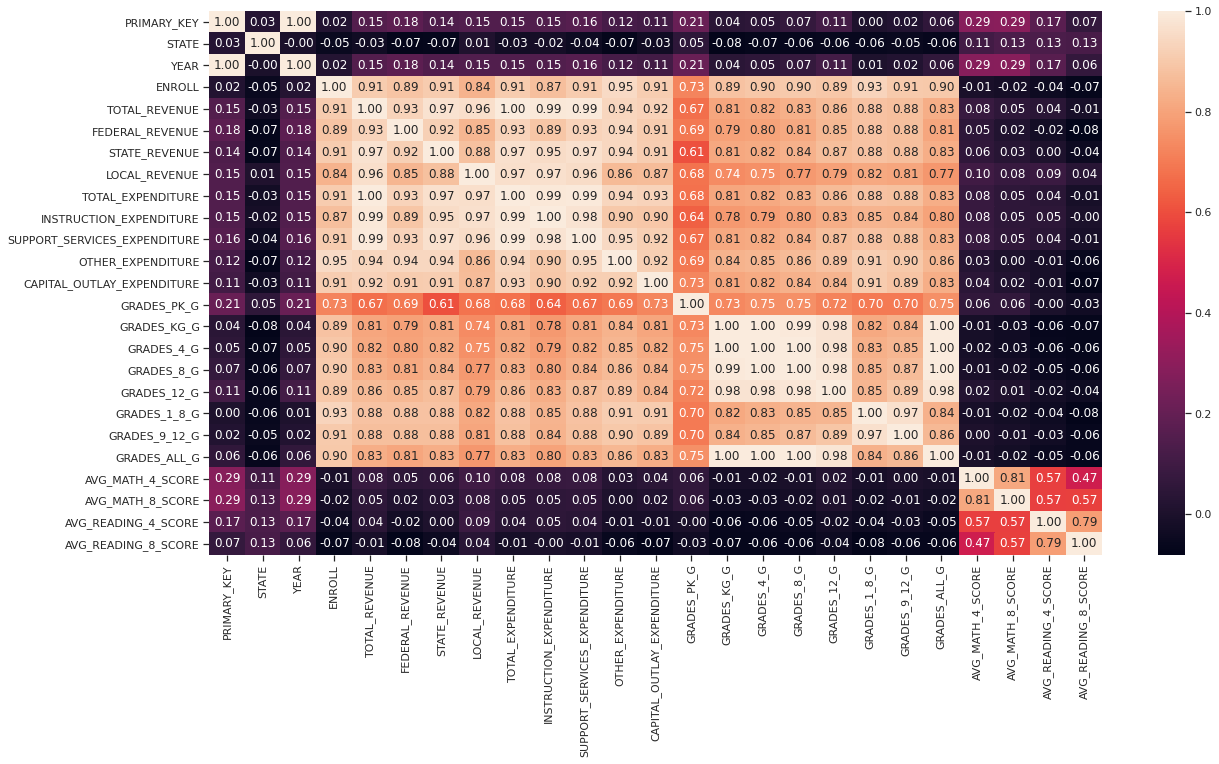

In [130]:
# определим, какие из признаков более всего связаны (коррелируют) с выбранным целевым признаком
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df[cols_to_check].corr(), annot=True, fmt='.2f')

In [131]:
corr_matrix = df.corr()
# наиболее коррелирующие признаки с расходами
corr_matrix['TOTAL_EXPENDITURE'].nlargest(10)

TOTAL_EXPENDITURE               1.000000
TOTAL_REVENUE                   0.999023
SUPPORT_SERVICES_EXPENDITURE    0.993309
INSTRUCTION_EXPENDITURE         0.991334
STATE_REVENUE                   0.970049
LOCAL_REVENUE                   0.965364
OTHER_EXPENDITURE               0.939415
CAPITAL_OUTLAY_EXPENDITURE      0.932388
FEDERAL_REVENUE                 0.928689
ENROLL                          0.908470
Name: TOTAL_EXPENDITURE, dtype: float64

In [0]:
# возьмем TOTAL_REVENUE, SUPPORT_SERVICES_EXPENDITURE и ENROLL (первые два признака связаны с прибылью/расходами, а enroll это число студентов всего)
most_corr = ['TOTAL_REVENUE', 'SUPPORT_SERVICES_EXPENDITURE', 'ENROLL']

# Анализ моделей

Будем использовать следующие метрики:
1. Mean absolute error (MAE) - средняя абсолютная ошибка
2. Mean squared error (MSQ) - средняя квадратичная ошибка
3. Метрика R2 или коэффициент детерминации

In [0]:
class MetricLogger:

  def __init__(self):
    self.df = pd.DataFrame(
        {'metric': pd.Series([], dtype='str'),
        'alg': pd.Series([], dtype='str'),
        'value': pd.Series([], dtype='float')})

  def add(self, metric, alg, value):
    """
    Добавление значения
    """
    # Удаление значения если оно уже было ранее добавлено
    self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
    # Добавление нового значения
    temp = [{'metric':metric, 'alg':alg, 'value':value}]
    self.df = self.df.append(temp, ignore_index=True)

  def get_data_for_metric(self, metric, ascending=True):
    """
    Формирование данных с фильтром по метрике
    """
    temp_data = self.df[self.df['metric']==metric]
    temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
    return temp_data_2['alg'].values, temp_data_2['value'].values
  
  def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
    """
    Вывод графика
    """
    array_labels, array_metric = self.get_data_for_metric(metric, ascending)
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                      align='center',
                      height=0.5, 
                      tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.5, a-0.05, str(round(b,3)), color='white')
    plt.show()

## Формирование выборок

Разделение на тестовую и обучающую выборки

In [135]:
regr_X_train, regr_X_test, regr_Y_train, regr_Y_test = train_test_split(df[most_corr], df['TOTAL_EXPENDITURE'], test_size=0.3, random_state=1)
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((1200, 3), (515, 3), (1200,), (515,))

## Модели регрессии

Для решения задачи регрессии будем использовать модели:
1. Случайный лес (RandomForestRegressor)
2. Градиентный бустинг (GradientBoostingRegressor)

In [0]:
regr_models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
}

regrMetricLogger = MetricLogger()

In [0]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    mse = mean_squared_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

In [139]:
df['TOTAL_EXPENDITURE'].describe()

count    1.715000e+03
mean     9.206242e+06
std      1.033950e+07
min      4.816650e+05
25%      3.004448e+06
50%      8.488521e+06
75%      9.206242e+06
max      8.532013e+07
Name: TOTAL_EXPENDITURE, dtype: float64

In [140]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

MAE=228600.726, MSE=475308146635.208, R2=0.995
*****************************************************
*****************************************************
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_spl

## Выводы о качестве полученных моделей

In [141]:
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

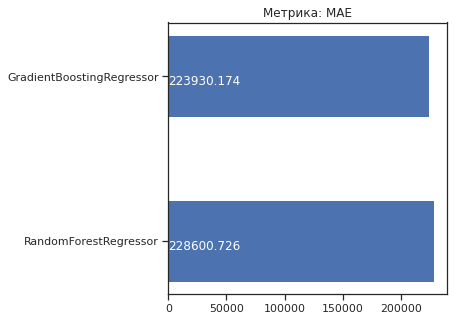

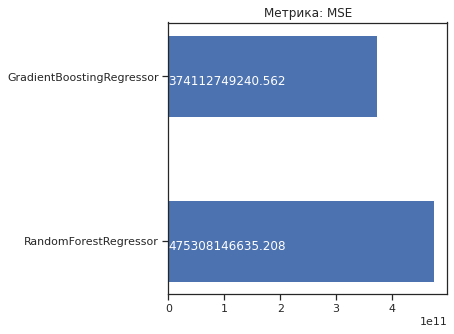

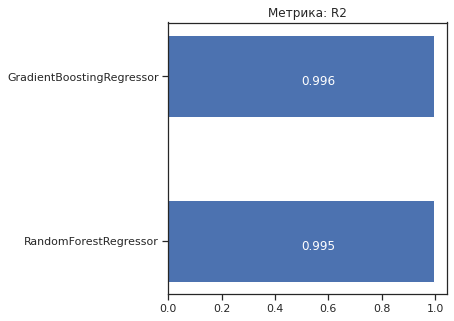

In [142]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(5, 5))
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(5, 5))
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(5, 5))

Из полученных данных можно сделать вывод, что в рамках текущей задачи модель градиентного бустинга лучше, чем модель случайного леса, тк среднеквадратичная ошибка много меньше, а коэффициент детерминизации и абсолютные ошибки примерно равны (абсолютные ошибки отличаются на 5000, но это около 2% от максимального значения)